**Executed:** Sun Jun  5 21:08:06 2016

**Duration:** 13 seconds.

# Leakage Coefficient Summary

> *This notebook summarize the leakage coefficient fitted from 4 dsDNA samples.*

## Import software

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
%matplotlib inline
#%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [2]:
figure_size = (5, 4)
default_figure = lambda: plt.subplots(figsize=figure_size)
save_figures = True

def savefig(filename, **kwargs):
    if not save_figures:
        return
    import os
    dir_ = 'figures/'
    kwargs_ = dict(dpi=300, bbox_inches='tight')
                   #frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    plt.savefig(dir_ + filename, **kwargs_)

## Data files

In [3]:
bsearch_str = 'Dem'
leakage_kde = pd.read_csv(
    'results/Multi-spot - leakage coefficient all values KDE %s.txt' % bsearch_str, index_col=0)
leakage_gauss = pd.read_csv(
    'results/Multi-spot - leakage coefficient all values gauss %s.txt' % bsearch_str, index_col=0)
nbursts = pd.read_csv(
    'results/Multi-spot - leakage coefficient all values nbursts %s.txt' % bsearch_str, index_col=0)
for df in (leakage_kde, leakage_gauss, nbursts):
    df.columns.name = 'Channel'

In [4]:
leakage_gauss

Channel,0,1,2,3,4,5,6,7
Sample,,,,,,,,
7d,0.041173,0.043589,0.039049,0.040638,0.040913,0.037526,0.036188,0.039272
12d,0.031078,0.044064,0.033672,0.035055,0.032208,0.037212,0.036395,0.038132
17d,0.036252,0.039984,0.041322,0.032848,0.038075,0.031988,0.033045,0.034200
DO,0.030591,0.035656,0.031211,0.031850,0.030329,0.030641,0.031228,0.031193


## Plot style

In [5]:
PLOT_DIR = './figure/'

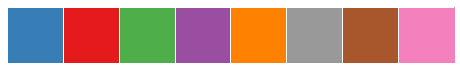

In [6]:
bmap = sns.color_palette("Set1", 9)
colors = np.array(bmap)[(1,0,2,3,4,8,6,7), :]
sns.set_palette(colors)
sns.palplot(colors)

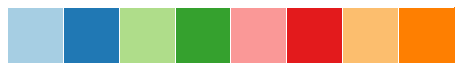

In [7]:
colors = sns.color_palette('Paired', 8)
sns.set_palette(colors)
sns.palplot(colors)

In [8]:
sns.set(style='ticks', font_scale=1.4)

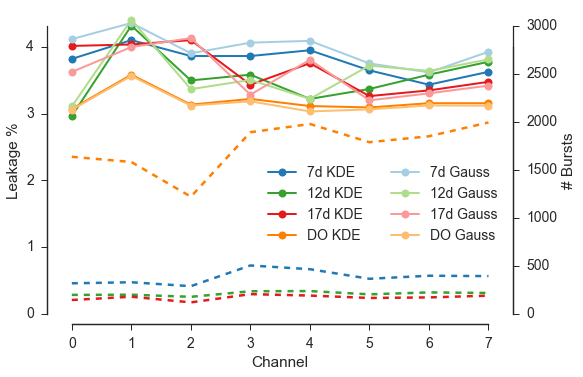

In [9]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

kws = dict(lw=2, marker='o', ms=8)
for i, did in enumerate(('7d', '12d', '17d', 'DO')):
    (100*leakage_kde).loc[did].plot(label='%s KDE' % did, ax=ax, color=colors[1+i*2], **kws)
    nbursts.loc[did].plot(ax=ax2, ls='--', lw=2.5, color=colors[1+i*2])

for i, did in enumerate(('7d', '12d', '17d', 'DO')):    
    (100*leakage_gauss).loc[did].plot(label='%s Gauss' % did, ax=ax, color=colors[i*2], **kws)
    
handles, lab = ax.get_legend_handles_labels()
h = handles#[1::2] + handles[::2]
l = lab[1::2] + lab[::2]
ax.legend(ncol=2, loc=1, bbox_to_anchor=(1, 0.5), borderaxespad=0.)
ax.set_ylim(0)

ax2.set_ylim(0, 3200)
plt.xlim(-0.25, 7.25)
plt.xlabel('Channel')
ax.set_ylabel('Leakage %')
ax2.set_ylabel('# Bursts')
sns.despine(offset=10, trim=True, right=False)
savefig('multi-spot leakage KDE vs Gauss.png')

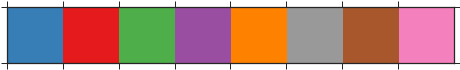

In [10]:
bmap = sns.color_palette("Set1", 9)
colors = np.array(bmap)[(1,0,2,3,4,8,6,7), :]
sns.set_palette(colors)
sns.palplot(colors)

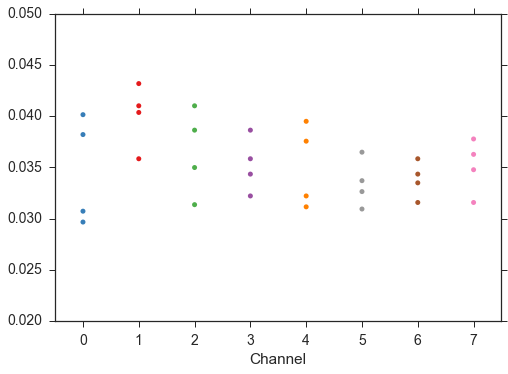

In [11]:
sns.swarmplot(data=leakage_kde);

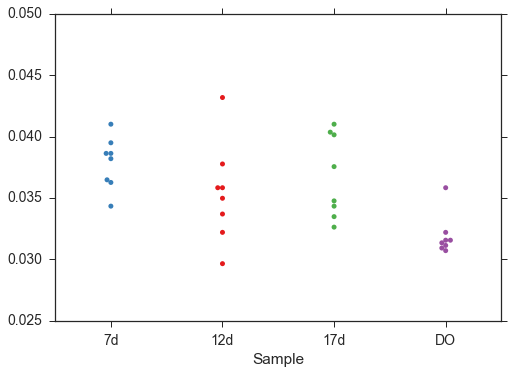

In [12]:
plt.figure()
sns.swarmplot(data=leakage_kde.T);

# Save results

In [13]:
sns.set_style('whitegrid')

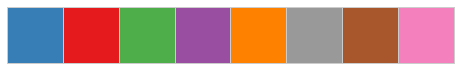

In [14]:
bmap = sns.color_palette("Set1", 9)
colors = np.array(bmap)[(1,0,2,3,4,8,6,7), :]
sns.set_palette(colors)
sns.palplot(colors)

## Average leakage

### Mean per sample:

In [15]:
lk_s = pd.DataFrame(index=['mean', 'std'], columns=leakage_kde.index)

lk_s.loc['mean'] = leakage_kde.mean(1)*100
lk_s.loc['std'] = leakage_kde.std(1)*100

# lk_s['mean'] = lk_s.mean(1)
lk_s

Sample,7d,12d,17d,DO
mean,3.78864,3.53979,3.67895,3.19142
std,0.209722,0.401738,0.339829,0.165025


### Mean per sample (weighted on the number of bursts):

Number of bursts in D-only population:

In [16]:
nbursts

Channel,0,1,2,3,4,5,6,7
Sample,,,,,,,,
7d,318,329,288,504,465,365,397,393
12d,197,199,177,235,237,203,223,217
17d,144,178,119,205,190,165,171,189
DO,1637,1583,1221,1893,1979,1789,1851,1995


In [17]:
leakage_kde

Channel,0,1,2,3,4,5,6,7
Sample,,,,,,,,
7d,0.038206,0.041016,0.038637,0.038637,0.039501,0.036484,0.034340,0.036269
12d,0.029654,0.043188,0.034982,0.035840,0.032205,0.033699,0.035840,0.037775
17d,0.040150,0.040366,0.041016,0.034340,0.037560,0.032631,0.033485,0.034768
DO,0.030715,0.035840,0.031353,0.032205,0.031140,0.030928,0.031566,0.031566


In [18]:
lk_sw = pd.DataFrame(index=['mean', 'std'], columns=leakage_kde.index)

lk_sw.loc['mean'] = (nbursts*leakage_kde).sum(1)/nbursts.sum(1)*100
lk_sw.loc['std'] = np.sqrt((((leakage_kde.T*100 - lk_sw.loc['mean']).T**2) * nbursts).sum(1) / (nbursts.sum(1) - 1))

#lk_sw['mean'] = (nbursts * lk_sw).sum(1) / nbursts.sum(1).sum()
lk_sw

Sample,7d,12d,17d,DO
mean,3.78608,3.53752,3.65209,3.1877
std,0.195181,0.368626,0.306379,0.148286


In [19]:
lk_swg = pd.DataFrame(index=['mean', 'std'], columns=leakage_gauss.index)

lk_swg.loc['mean'] = (nbursts*leakage_gauss).sum(1)/nbursts.sum(1)*100
lk_swg.loc['std'] = np.sqrt((((leakage_gauss.T*100 - lk_swg.loc['mean']).T**2) * nbursts).sum(1) / (nbursts.sum(1) - 1))

#lk_sw['mean'] = (nbursts * lk_sw).sum(1) / nbursts.sum(1).sum()
lk_sw

Sample,7d,12d,17d,DO
mean,3.78608,3.53752,3.65209,3.1877
std,0.195181,0.368626,0.306379,0.148286


In [20]:
sns.set_style('ticks')

In [21]:
lk_sw_m = pd.concat((lk_sw.loc['mean'], lk_swg.loc['mean']), axis=1, keys=['KDE', 'Gauss'])
lk_sw_m

,KDE,Gauss
Sample,,
7d,3.78608,3.97789
12d,3.53752,3.594
17d,3.65209,3.57204
DO,3.1877,3.15308


In [22]:
lk_sw_s = pd.concat((lk_sw.loc['std'], lk_swg.loc['std']), axis=1, keys=['KDE', 'Gauss'])
lk_sw_s

,KDE,Gauss
Sample,,
7d,0.195181,0.210815
12d,0.368626,0.374035
17d,0.306379,0.317571
DO,0.148286,0.154682


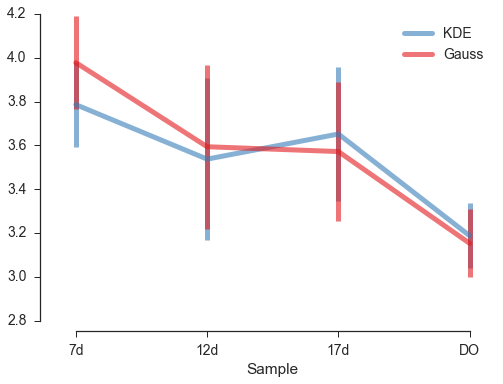

In [23]:
lk_sw_m.plot(yerr=lk_sw_s, lw=5, alpha=0.6)
plt.xlim(-0.2, 3.2)
plt.xticks(range(4), lk_sw_s.index)
sns.despine(trim=True, offset=10)

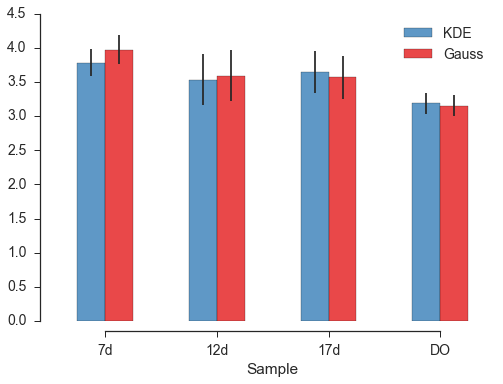

In [24]:
lk_sw_m.plot.bar(yerr=lk_sw_s, alpha=0.8)
sns.despine(trim=True, offset=10)

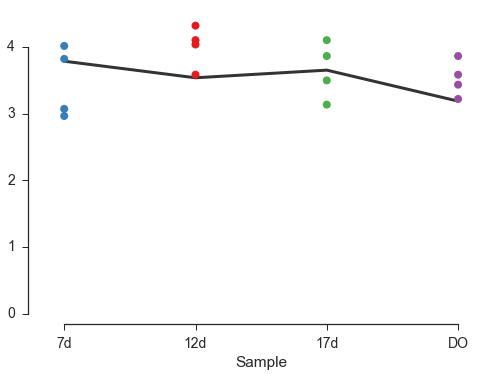

In [25]:
sns.swarmplot(data=leakage_kde*100, size=8);
plt.ylim(0)
lk_sw_m.loc[:,'KDE'].plot(lw=3, alpha=0.8, color='k')
plt.xlim(-0.2, 3.2)
plt.xticks(range(4), lk_sw_s.index)
sns.despine(trim=True, offset=10)

### Mean per channel:

In [26]:
lk_c = pd.DataFrame(index=['mean', 'std'], columns=leakage_kde.columns)

lk_c.loc['mean'] = leakage_kde.mean()*100
lk_c.loc['std'] = leakage_kde.std()*100

#lk_c['mean'] = lk_c.mean(1)
lk_c

Channel,0,1,2,3,4,5,6,7
mean,3.46813,4.01026,3.64972,3.52556,3.51015,3.34354,3.38077,3.50946
std,0.527036,0.308721,0.423304,0.270328,0.406117,0.233091,0.17836,0.265349


### Mean per channel (weighted on the number of bursts):

In [27]:
lk_cw = pd.DataFrame(index=['mean', 'std'], columns=leakage_kde.columns)

lk_cw.loc['mean'] = (nbursts*leakage_kde).sum()/nbursts.sum()*100
lk_cw.loc['std'] = np.sqrt((((leakage_kde*100 - lk_cw.loc['mean'])**2) * nbursts).sum(0) / (nbursts.sum(0) - 1))


#lk_cw['mean'] = lk_cw.mean(1)
lk_cw

Channel,0,1,2,3,4,5,6,7
mean,3.22534,3.75748,3.35083,3.3803,3.30072,3.20665,3.24677,3.29264
std,0.333008,0.267048,0.33578,0.249458,0.326505,0.199527,0.145748,0.222501


In [28]:
lk_cwg = pd.DataFrame(index=['mean', 'std'], columns=leakage_gauss.columns)

lk_cwg.loc['mean'] = (nbursts*leakage_gauss).sum()/nbursts.sum()*100
lk_cwg.loc['std'] = np.sqrt((((leakage_kde*100 - lk_cwg.loc['mean'])**2) * nbursts).sum(0) / (nbursts.sum(0) - 1))

#lk_cwg['mean'] = lk_cwg.mean(1)
lk_cwg

Channel,0,1,2,3,4,5,6,7
mean,3.24533,3.78635,3.33697,3.37488,3.2711,3.22544,3.25269,3.30716
std,0.333608,0.268605,0.336066,0.249517,0.327846,0.200411,0.145868,0.222975


In [29]:
lk_cw_m = pd.concat((lk_cw.loc['mean'], lk_cwg.loc['mean']), axis=1, keys=['KDE', 'Gauss'])
lk_cw_m.T

Channel,0,1,2,3,4,5,6,7
KDE,3.22534,3.75748,3.35083,3.3803,3.30072,3.20665,3.24677,3.29264
Gauss,3.24533,3.78635,3.33697,3.37488,3.2711,3.22544,3.25269,3.30716


In [30]:
lk_cw_s = pd.concat((lk_cw.loc['std'], lk_cwg.loc['std']), axis=1, keys=['KDE', 'Gauss'])
lk_cw_s.T

Channel,0,1,2,3,4,5,6,7
KDE,0.333008,0.267048,0.33578,0.249458,0.326505,0.199527,0.145748,0.222501
Gauss,0.333608,0.268605,0.336066,0.249517,0.327846,0.200411,0.145868,0.222975


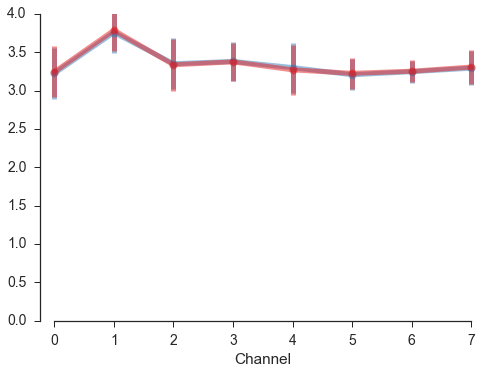

In [31]:
kws = dict(lw=5, marker='o', ms=8, alpha=0.5)
lk_cw.loc['mean'].plot(yerr=lk_cw.loc['std'], **kws)
lk_cwg.ix['mean',:].plot(yerr=lk_cwg.loc['std'],**kws)
plt.ylim(0, 4)
plt.xlim(-0.25, 7.25)
plt.xticks(np.arange(8));
sns.despine(trim=True)

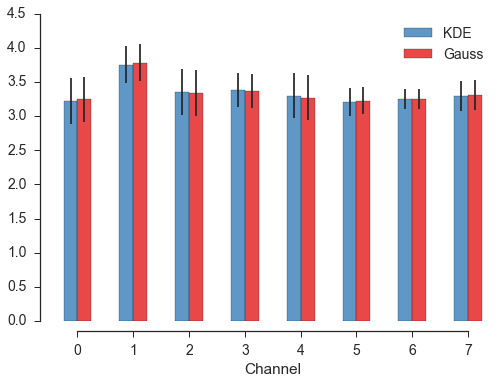

In [32]:
lk_cw_m.plot.bar(yerr=lk_cw_s, alpha=0.8)
sns.despine(trim=True, offset=10)

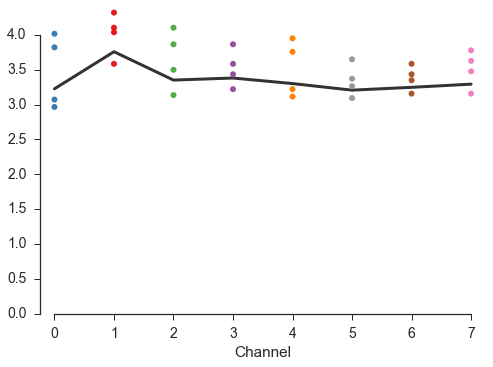

In [33]:
sns.swarmplot(data=leakage_kde*100, size=6);
lk_cw_m.loc[:,'KDE'].plot(lw=3, alpha=0.8, color='k')
plt.ylim(0)
plt.xlim(-0.25, 7.25)
plt.xticks(np.arange(8));
sns.despine(trim=True)

> **NOTE:** There is a per-channel trend that cannot be ascribed to the background 
> because we performend a D-emission burst search and selection and the leakage vs ch
> does not resemble the D-background vs channel curve.
>
> The effect is probably due to slight PDE variations (detectors + optics) that 
> slightly change $\gamma$ on a per-spot basis.

### Weighted mean of the weighted mean

In [34]:
leakage_kde_wmean = (leakage_kde*nbursts).sum().sum() / nbursts.sum().sum()
leakage_kde_wmean

0.033399258451877703

# Figure

In [35]:
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

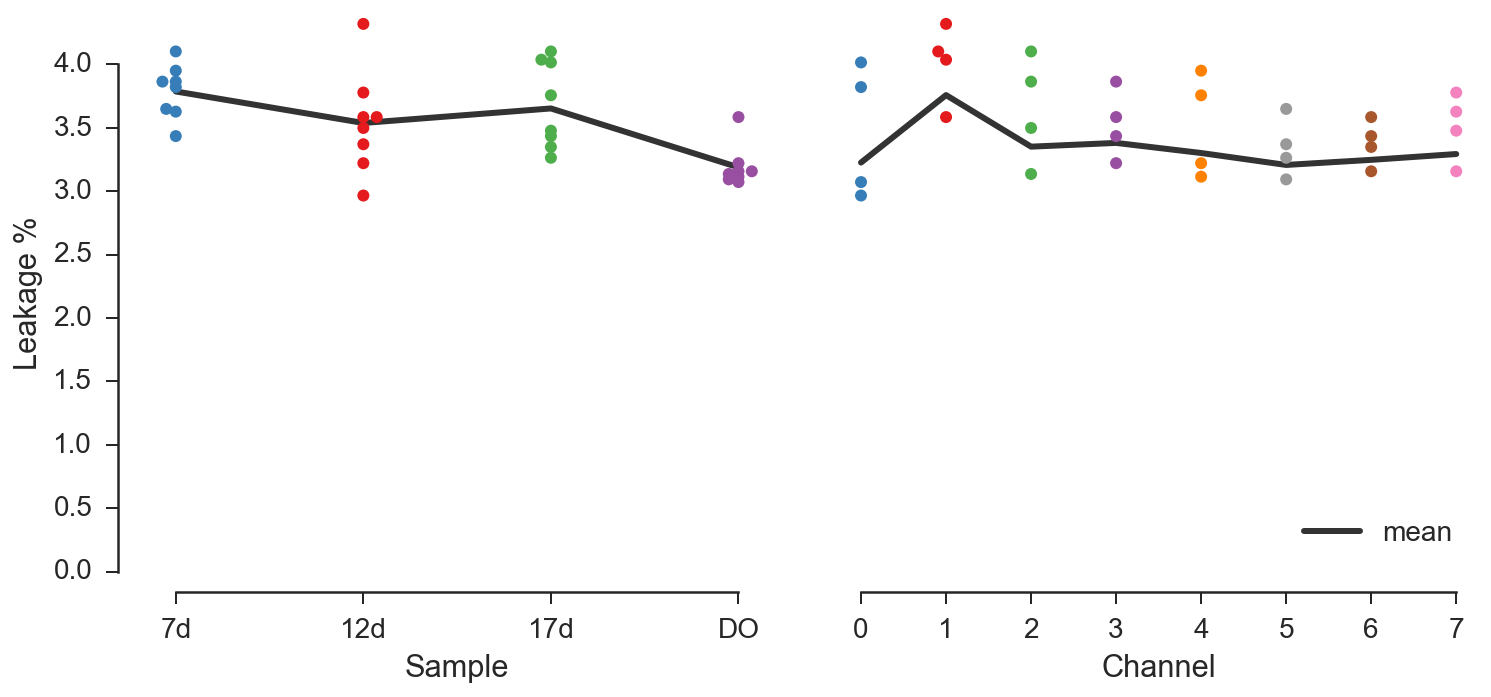

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplots_adjust(wspace=0.1)

sns.swarmplot(data=leakage_kde.T*100, size=6, ax=ax[0]);
lk_sw_m.loc[:,'KDE'].plot(lw=3, alpha=0.8, color='k', ax=ax[0])
ax[0].set_ylim(0)
ax[0].set_xlim(-0.2, 3.2)
plt.xticks(range(4), lk_sw_s.index)
sns.despine(trim=True, offset=10, ax=ax[0])

sns.swarmplot(data=leakage_kde*100, size=6, ax=ax[1]);
lk_cw_m.loc[:,'KDE'].plot(lw=3, alpha=0.8, color='k', ax=ax[1], label='mean')
ax[1].set_ylim(0)
ax[1].set_xlim(-0.25, 7.25)
plt.xticks(np.arange(8));
sns.despine(trim=True, offset=10, ax=ax[1], left=True)
ax[1].yaxis.set_visible(False)

ax[0].set_ylabel('Leakage %')
ax[1].legend(loc=4)

Now I will transform `leakage_kde` in "tidy form" for
easier plotting (the colors in the right panel above
should be the sample).

For info on "data tidying" see:

- http://stackoverflow.com/questions/37490771/seaborn-categorical-plot-with-hue-from-dataframe-rows/
- https://www.ibm.com/developerworks/community/blogs/jfp/entry/Tidy_Data_In_Python

In [37]:
df = (leakage_kde*100).copy()
df.T.reset_index()[:3]

Sample,Channel,7d,12d,17d,DO
0,0,3.820598,2.965404,4.014978,3.071532
1,1,4.101603,4.318798,4.036621,3.584007
2,2,3.863731,3.498241,4.101603,3.135314


In [38]:
df.T.stack().reset_index()[:3]

,Channel,Sample,0
0,0,7d,3.820598
1,0,12d,2.965404
2,0,17d,4.014978


In [39]:
df_tidy = pd.melt(df.T.reset_index(), id_vars='Channel', value_name='Leakage')
df_tidy[:3]

,Channel,Sample,Leakage
0,0,7d,3.820598
1,1,7d,4.101603
2,2,7d,3.863731


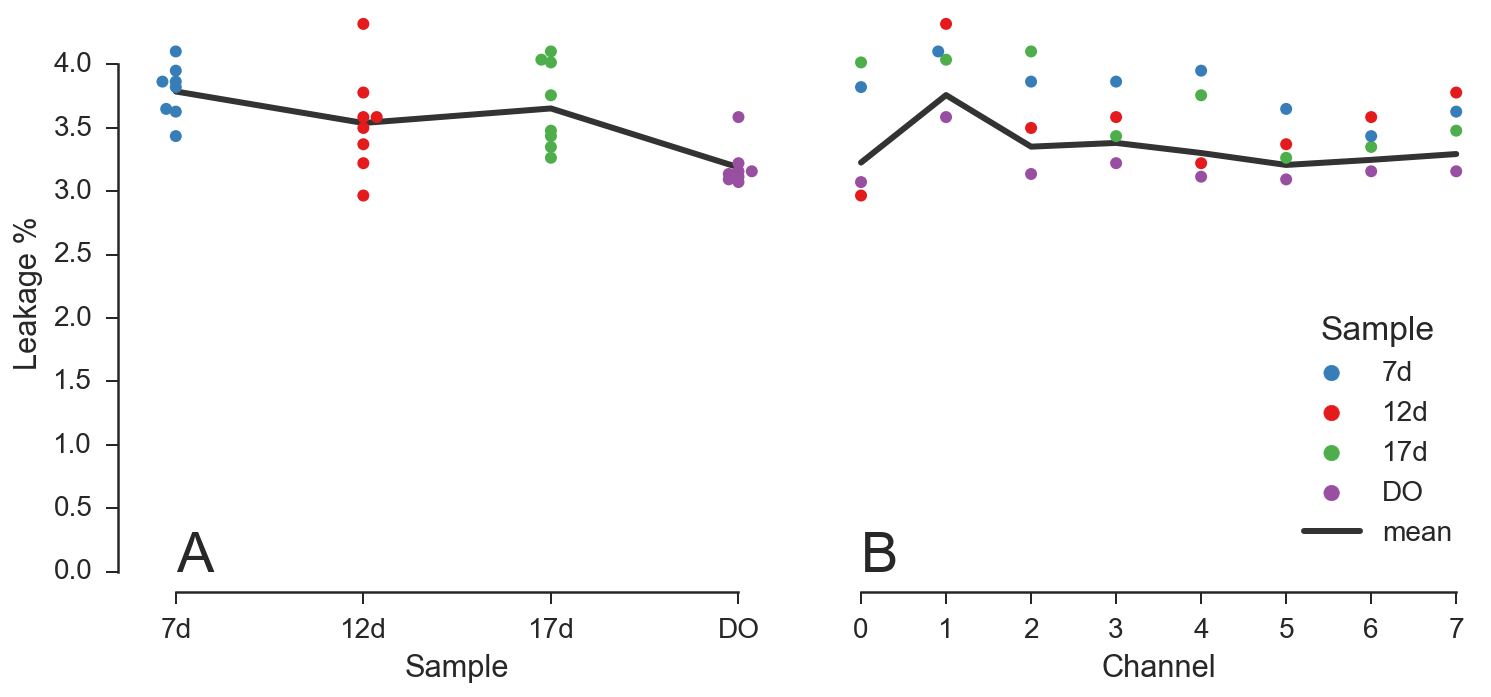

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplots_adjust(wspace=0.1)

sns.swarmplot(data=leakage_kde.T*100, size=6, ax=ax[0]);
lk_sw_m.loc[:,'KDE'].plot(lw=3, alpha=0.8, color='k', ax=ax[0])
ax[0].set_ylim(0)
ax[0].set_xlim(-0.2, 3.2)
plt.xticks(range(4), lk_sw_s.index)
sns.despine(trim=True, offset=10, ax=ax[0])

sns.swarmplot(x='Channel', y='Leakage', data=df_tidy, size=6, hue='Sample', ax=ax[1]);
lk_cw_m.loc[:,'KDE'].plot(lw=3, alpha=0.8, color='k', ax=ax[1], label='mean')
ax[1].set_ylim(0)
ax[1].set_xlim(-0.25, 7.25)
plt.xticks(np.arange(8));
sns.despine(trim=True, offset=10, ax=ax[1], left=True)
ax[1].yaxis.set_visible(False)
ax[0].set_ylabel('Leakage %')
leg = ax[1].get_legend()
h, l = ax[1].get_legend_handles_labels()
ax[1].legend(h[1:] + h[:1], l[1:] + l[:1], title='Sample', loc='lower right')
fs = 28
ax[0].text(0,0, 'A', fontsize=fs)
ax[1].text(0,0, 'B', fontsize=fs)
savefig('multi-spot leakage KDE 2panels.png')

# Save

## Per-channel mean

In [41]:
lk_cw.to_csv('results/Multi-spot - leakage coefficient mean per-ch KDE %s.txt' % bsearch_str)

## Per-sample mean

In [42]:
lk_sw.to_csv('results/Multi-spot - leakage coefficient mean per-sample KDE %s.txt' % bsearch_str)

## Global mean

In [43]:
'%.5f' % leakage_kde_wmean

'0.03340'

In [44]:
with open('results/Multi-spot - leakage coefficient KDE wmean %s.txt' % bsearch_str, 'w') as f:
    f.write('%.5f' % leakage_kde_wmean)